In [127]:
import numpy as np
import pandas as pd

In [128]:
df = pd.read_excel('Expanded_data_with_more_features.xlsx')

num_train = int(len(df)*0.8)

df_train = df[:num_train]
df_test = df[num_train+1:]

df.head()

,cod,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,2023-10-05 00:00:00,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,2023-10-05 00:00:00,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,2023-10-05 00:00:00,76,78,75


In [129]:
df_train['Gender'] = np.where(df_train['Gender'].isin(['male']), -1, 1)
ytr = np.array(df_train['Gender'])

df_test['Gender'] = np.where(df_test['Gender'].isin(['male']), -1, 1)
yte = np.array(df_test['Gender'])

<ipython-input-129-0efec7d732eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Gender'] = np.where(df_train['Gender'].isin(['male']), -1, 1)
<ipython-input-129-0efec7d732eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Gender'] = np.where(df_test['Gender'].isin(['male']), -1, 1)


In [130]:
lista_train = []
for i in df_train.index:
   tupla=[df_train['MathScore'][i],df_train['ReadingScore'][i]]
   lista_train.append(tupla)
Xtr = np.array(lista_train)


lista_test = []
for i in df_test.index:
   tupla=[df_test['MathScore'][i],df_test['ReadingScore'][i]]
   lista_test.append(tupla)
Xte = np.array(lista_test)


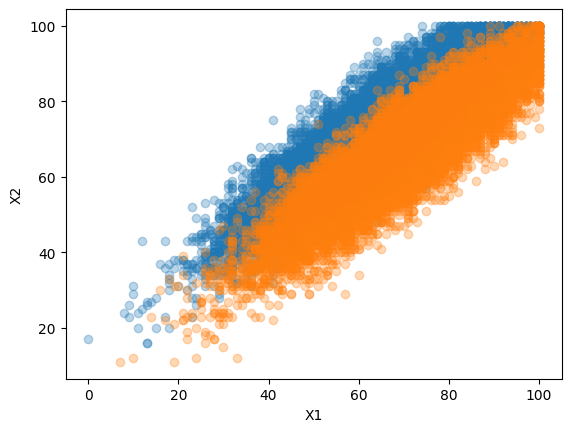

In [131]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

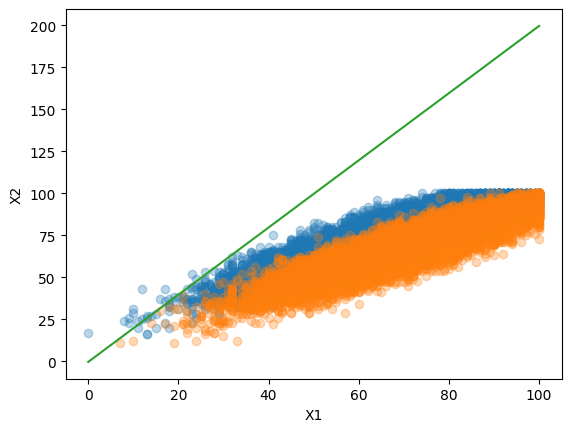

In [132]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plt.plot(xs,ys)

plotaDatasetBidimensional(Xtr, ytr)
vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(Xtr, ytr, vetor_hyperplano, intercept)

In [133]:
def sign(a):
  return (a >= 0) * 2 - 1

In [134]:
def accuracy(yactual, ypred):
  return sum(yactual == ypred)/len(yactual)

0.5487108355091384
[  -21611.73186691 -6038265.42993572  7311078.990165  ]


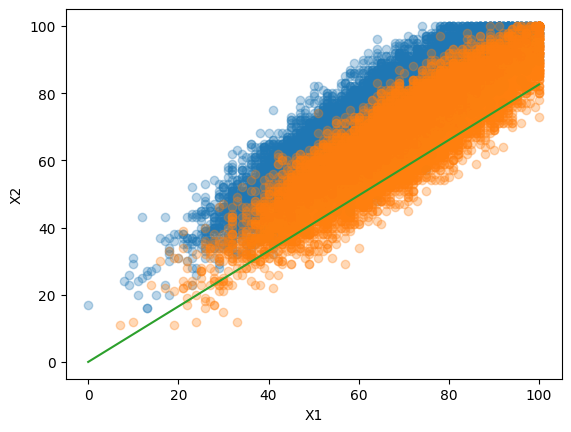

In [135]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100):
     self.w = None
     self.activation = sign
     self.max_iter = max_iter

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erros = y - ypred
      custo = sum(erros**2)
      if custo == 0:
        break
      self.w += Xb.T @ erros

  def predict(self, X):
    Xb = include_bias(X)
    a = Xb @ self.w
    ypred = self.activation(a)
    return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])

0.5440600522193212


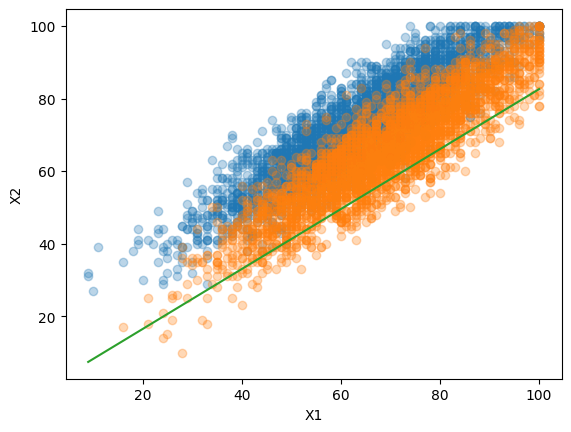

In [136]:
print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])